[My GitHub](https://github.com/Joba19/DSCI-235-Project)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MultipleLocator
from datetime import datetime

Main Topic:  
My main goal of the project is to show how working from home can affect workers and the overall business. I want to show all the possible advantages and disadvantages of this type of work and the possible factors that popularized and changed the indrustry. I am using the datasets [U.S. Bureau of Labor Statistics](https://www.bls.gov/opub/ted/2023/about-1-in-3-workers-in-management-professional-and-related-occupations-teleworked-november-2023.htm) and [WFH Research](https://wfhresearch.com/) to help visualize and understand telework and working from home.

The Project Timeline:  
  
Week 1 - 2: Download, Clean, and Preprocess the data from the datasets. While fixing any missing data I can find.  

Week 3 - 4: Explore and analyze cleaned data to begin understanding/preprocessing the answers to my objective.  

Week 5 - 6: Write Notes on my finding / preparation to display what the data reads. 

Week 7 - 8: Build visual ways to display the evidence and properly analyze it. (For example charts, survey outcomes, timelines, correlations, etc.)  

Week 9 - 10: Write the final version of my study hopefully having an outcome with strong evidence pointing to it.  
  
  If you curious heres my [Project proposal](https://github.com/Joba19/DSCI-235-Project/blob/main/Project_Checkpoints/Project_Proposal.pdf) and both [Project Checkpoint 1](https://github.com/Joba19/DSCI-235-Project/blob/main/Project_Checkpoints/Project_Checkpoint_1.pdf) and [Project Checkpoint 2](https://github.com/Joba19/DSCI-235-Project/blob/main/Project_Checkpoints/Project_Checkpoint_2.pdf). Hopefully this helps visualize my overall progress in developing this project.

This code below is the setup and cleaning of the [U.S. Bureau of Labor Statistics](https://www.bls.gov/opub/ted/2023/about-1-in-3-workers-in-management-professional-and-related-occupations-teleworked-november-2023.htm) and [WFH Research](https://wfhresearch.com/) datasets. I pulled 2 tables from both datasets then converted them from .xlsx to .cvs files. We will use these to help answer the  Main topic and the following below questions:
  
- How common is Telework/Working from home in America in the modern day? 
- What Industry is the most remote?
- What's the average age for people working from home?
- What's the average Education Level of teleworkers?
- How many hours on average do a Teleworker working full time clock in compared to an in person worker?
- How has COVID affected Working from home?  
  
This code is the setup and cleaning of the [U.S. Bureau of Labor Statistics](https://www.bls.gov/opub/ted/2023/about-1-in-3-workers-in-management-professional-and-related-occupations-teleworked-november-2023.htm) Telework Status (Table1) dataset:

In [3]:
file_path = "https://raw.githubusercontent.com/Joba19/DSCI-235-Project/main/DataSets/telework-tables(Telework_Status)-2025-March-(T1).csv"
df_tele_stat = pd.read_csv(file_path, skiprows=3)

# Rename the Columns
df_tele_stat.columns = ["Characteristic", "Total at work", "Telework Total", "Telework Some","Telework All", "No Telework", "Pct Total at work", "Pct Telework Total","Pct Telework Some", "Pct Telework All", "Pct No Telework"]

# Cleans the data
df_tele_stat.dropna(subset=["Characteristic"], inplace=True)
df_tele_stat.reset_index(drop=True, inplace=True)

df_tele_stat["Telework Total"] = (df_tele_stat["Telework Total"].astype(str).str.replace(",", "", regex=True).str.strip().replace("", pd.NA))# Cleans the column as string
df_tele_stat["Telework Total"] = pd.to_numeric(df_tele_stat["Telework Total"], errors="coerce") # Converts to int
df_tele_stat.dropna(subset=["Telework Total"], inplace=True) # Removes NaN
df_tele_stat["Characteristic"] = df_tele_stat["Characteristic"].str.strip() # Strips the whitespace from Characteristic
df_tele_stat["Pct Telework Total"] = (df_tele_stat["Pct Telework Total"].astype(str).str.replace(",", "", regex=True).str.strip()) # Clean and convert percentage columns to float
df_tele_stat["Pct Telework Total"] = pd.to_numeric(df_tele_stat["Pct Telework Total"], errors="coerce")
df_tele_stat["Pct No Telework"] = (df_tele_stat["Pct No Telework"].astype(str).str.replace(",", "", regex=True).str.strip())
df_tele_stat["Pct No Telework"] = pd.to_numeric(df_tele_stat["Pct No Telework"], errors="coerce")

# Display cleaned data
df_tele_stat.head(10)

,Characteristic,Total at work,Telework Total,Telework Some,Telework All,No Telework,Pct Total at work,Pct Telework Total,Pct Telework Some,Pct Telework All,Pct No Telework
2,"Total, 16 years and over","158,300",36069.0,"19,653","16,415","122,231",100.0,22.8,12.4,10.4,77.2
3,16 to 24 years,"19,270",1339.0,792,547,"17,931",100.0,6.9,4.1,2.8,93.1
4,16 to 19 years,"5,308",118.0,30,88,"5,190",100.0,2.2,0.6,1.7,97.8
5,20 to 24 years,"13,961",1221.0,762,458,"12,741",100.0,8.7,5.5,3.3,91.3
6,25 to 54 years,"102,418",26049.0,"14,358","11,691","76,368",100.0,25.4,14.0,11.4,74.6
7,25 to 34 years,"35,375",8122.0,"4,735","3,387","27,253",100.0,23.0,13.4,9.6,77.0
8,35 to 44 years,"35,870",9829.0,"5,335","4,495","26,040",100.0,27.4,14.9,12.5,72.6
9,45 to 54 years,"31,173",8098.0,"4,288","3,810","23,075",100.0,26.0,13.8,12.2,74.0
10,55 years and over,"36,612",8681.0,"4,503","4,177","27,931",100.0,23.7,12.3,11.4,76.3
11,55 to 64 years,"25,824",5936.0,"3,328","2,608","19,889",100.0,23.0,12.9,10.1,77.0


This code is the setup and cleaning of the [U.S. Bureau of Labor Statistics](https://www.bls.gov/opub/ted/2023/about-1-in-3-workers-in-management-professional-and-related-occupations-teleworked-november-2023.htm) Average Hours (Table 4) dataset:

In [4]:
file_path = "https://raw.githubusercontent.com/Joba19/DSCI-235-Project/main/DataSets/telework-tables(Average_hours)-2025-March-(T4).csv"
df_avg_hours = pd.read_csv(file_path, skiprows=3)

# Rename columns to match your desired structure
df_avg_hours.columns = [
    "Characteristic","# of Persons (In 1000s)","All Avg Telework Hours","All Avg Total Hours","All Telework Hours Pct","# of Telework Persons (in 1000s)","Telework Avg Telework Hours","Telework Avg Total Hours","Telework Hours Pct"
]

# Clean all numeric columns
numeric_cols = df_avg_hours.columns[1:]
df_avg_hours[numeric_cols] = df_avg_hours[numeric_cols].apply(
    lambda col: pd.to_numeric(col.astype(str).str.replace(",", "").str.strip(), errors="coerce")
)

# Clean text column
df_avg_hours["Characteristic"] = df_avg_hours["Characteristic"].astype(str).str.strip()
df_avg_hours = df_avg_hours[df_avg_hours["Characteristic"] != "Occupation"]

# Display
df_avg_hours.head()


,Characteristic,# of Persons (In 1000s),All Avg Telework Hours,All Avg Total Hours,All Telework Hours Pct,# of Telework Persons (in 1000s),Telework Avg Telework Hours,Telework Avg Total Hours,Telework Hours Pct
0,"Total, 16 years and over",158300.0,6.0,38.2,15.7,36069.0,26.4,40.1,65.8
1,Full-time workers,130724.0,6.8,42.0,16.2,31785.0,27.9,42.8,65.2
2,Part-time workers,27575.0,2.3,20.5,11.4,4283.0,15.1,19.9,75.7
4,"Management, professional, and related occupations",69690.0,9.9,39.7,25.0,26325.0,26.2,40.4,64.9
5,"Management, business, and financial operations...",30261.0,12.1,41.4,29.4,13620.0,27.0,41.4,65.3


This code is the setup and cleaning the [WFH Research](https://wfhresearch.com/) (Thanks to Barrero, Jose Maria, Nicholas Bloom, and Steven J. Davis, 2021 for the amazing dataset used in their "Why working from home will stick," National Bureau of Economic Research Working Paper 28731). Below is the WTF Rates By Indrustry dataset:

In [5]:
file_path = "https://raw.githubusercontent.com/Joba19/DSCI-235-Project/main/DataSets/WFHtimeseries_monthly_(Indrustry).csv"

df_indrustry = pd.read_csv(file_path)

df_indrustry.columns = ["Date","Entertainment","Education","Insurance","Government","Healthcare","Hospitaility \\ Food","Information","Manufacturing","Bus Services","Realestate","Retail","Transport \\ Warehousing","Utilities","Wholesale","License","Citations"]

df_indrustry.head()

,Date,Entertainment,Education,Insurance,Government,Healthcare,Hospitaility \ Food,Information,Manufacturing,Bus Services,Realestate,Retail,Transport \ Warehousing,Utilities,Wholesale,License,Citations
0,1/1/2022,34.8,24.4,44.8,26.9,26.0,11.8,48.42,17.42,40.46,35.48,15.00,13.17,28.22,37.37,"Copyright 2025 by Jose Maria Barrero, Nicholas...","When using this work, please cite: Barrero, J..."
1,1/1/2023,35.9,21.8,43.1,24.1,25.2,11.2,45.28,16.13,39.19,26.16,13.98,13.31,28.17,26.57,NaN,NaN
2,1/1/2024,32.5,19.5,45.0,26.8,25.7,10.3,44.70,16.16,38.99,33.68,13.47,13.26,31.49,30.14,NaN,NaN


This code is the setup and cleaning the [WFH Research](https://wfhresearch.com/) (Thanks to Barrero, Jose Maria, Nicholas Bloom, and Steven J. Davis, 2021 for the amazing dataset used in their "Why working from home will stick," National Bureau of Economic Research Working Paper 28731). Below is the WFH before-during COVID dataset:

In [6]:
file_path = "https://raw.githubusercontent.com/Joba19/DSCI-235-Project/main/DataSets/WFHtimeseries_monthly_(Before-During_COVID).csv"
df_covid = pd.read_csv(file_path)

# Rename columns to more readable names, and removes all the NaN while keeping orignal formats
df_covid.columns = ["Date","ATUS estimate","COVID-era measurements","Teleworker Survey estimate","Notes", "License", "Citation"]
numeric_cols = ["ATUS estimate", "COVID-era measurements", "Teleworker Survey estimate"]
df_covid[numeric_cols] = df_covid[numeric_cols].fillna(0.0)
text_cols = ["Notes", "License", "Citation"]
df_covid[text_cols] = df_covid[text_cols].fillna("")
df_covid["Date"] = pd.to_datetime(df_covid["Date"], format="%m/%d/%Y", errors="coerce")

# Preview the cleaned data
df_covid.head()

,Date,ATUS estimate,COVID-era measurements,Teleworker Survey estimate,Notes,License,Citation
0,2020-03-01,7.2,0.0,0.0,Pre-COVID value is Authors' estimate using dat...,,
1,2020-05-01,0.0,61.5,0.0,,"Copyright 2025 by Jose Maria Barrero, Nicholas...","When using this work, please cite: Barrero, J..."
2,2020-07-01,0.0,51.1,0.0,,,
3,2020-08-01,0.0,48.3,0.0,,,
4,2020-09-01,0.0,44.3,0.0,,,


The first research question I will tackle will be using the [U.S. Bureau of Labor Statistics](https://www.bls.gov/opub/ted/2023/about-1-in-3-workers-in-management-professional-and-related-occupations-teleworked-november-2023.htm) dataset.  
- How common is Telework/Working from home in America in the modern day?  
  
This data is from March 2025, It is the most recent data I could pull from the [U.S. Bureau of Labor Statistics](https://www.bls.gov/opub/ted/2023/about-1-in-3-workers-in-management-professional-and-related-occupations-teleworked-november-2023.htm) dataset. This data also covers all indrustiries making the below output no too surprising.

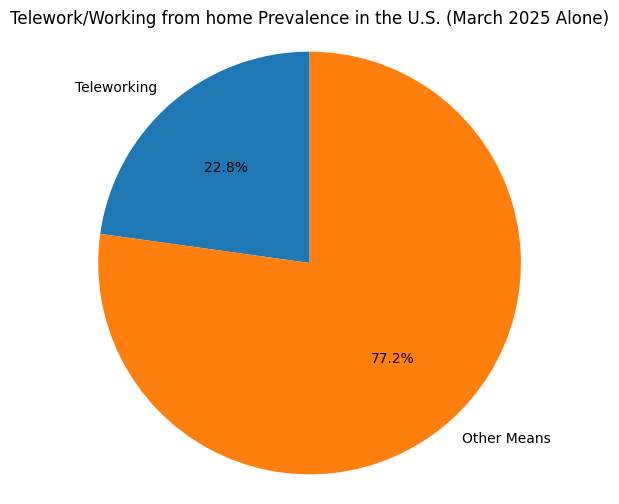

In [7]:
# Filters The Row "Total, 16 years and over"
total_row = df_tele_stat[df_tele_stat["Characteristic"] == "Total, 16 years and over"].iloc[0]

# Gets Telework and No Telework Values
telework_pct = total_row["Pct Telework Total"]
no_telework_pct = total_row["Pct No Telework"]

# Labels and Values For The Pie Chart
labels = ["Teleworking", "Other Means"]
values = [telework_pct, no_telework_pct]

# Creates The Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Telework/Working from home Prevalence in the U.S. (March 2025 Alone)")
plt.axis('equal')
plt.show()

This data isn't anything new. Its not really a fair comparison, This data includes all major forms of indrustry (For example: Entertainment,Education,Insurance, etc). But I will say this made the think:

- what Industry is the most remote?  

So using the [WFH Research](https://wfhresearch.com/) dataset I made a Graph show that the Insureance and Information (Example: News) Industries has the most teleworker/Workers from home.

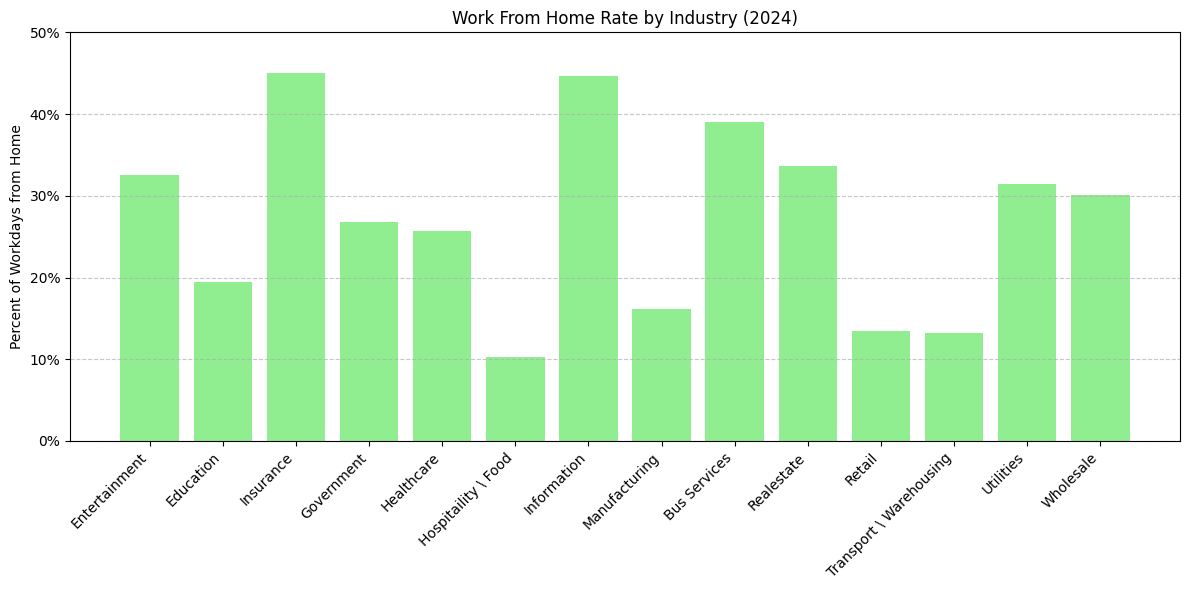

In [8]:
df_indrustry["Date"] = pd.to_datetime(df_indrustry["Date"])

latest = df_indrustry.iloc[-1][1:15]  # Removes 'Date', 'License', 'Citations'

# Creates the Plot
plt.figure(figsize=(12, 6))
plt.bar(latest.index, latest.values, color='lightgreen')
plt.title("Work From Home Rate by Industry (2024)")
plt.ylabel("Percent of Workdays from Home")
plt.xticks(rotation=45, ha='right')
plt.ylim(0, max(latest.values) + 5)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:.0f}%"))
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

I think this graph is the craziest graph on this analysis, how is Bus Services even competing with indrustires like "Entertainment" or "Education." The most common indrustries are Insurance and Information. This makes sense, but Bus services being the 3rd most remote worked industrie is fascinating to me.
Next I researched:  

- What's the average age for people working from home?

Below is the Graph I made, using the [U.S. Bureau of Labor Statistics](https://www.bls.gov/opub/ted/2023/about-1-in-3-workers-in-management-professional-and-related-occupations-teleworked-november-2023.htm) Telework Status dataset:

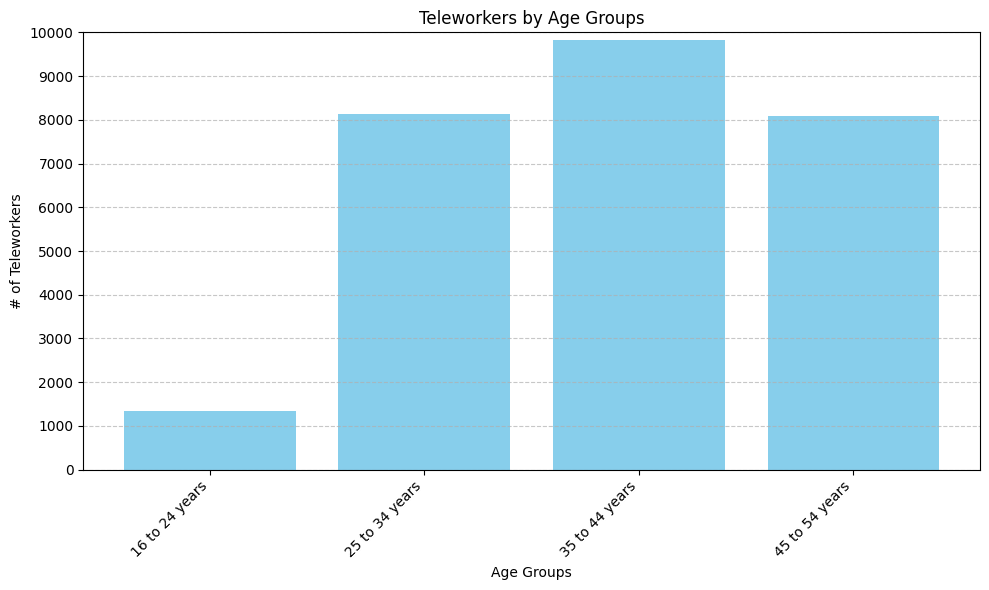

In [9]:
# Filter for first 8 rows
filtered_df = df_tele_stat.iloc[0:8].copy()

# Remove specific rows by value in the "Characteristic" column
exclude = ["Total, 16 years and over", "25 to 54 years", "16 to 19 years", "20 to 24 years"]
filtered_df = filtered_df[~filtered_df["Characteristic"].isin(exclude)]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(filtered_df["Characteristic"], filtered_df["Telework Total"], color='skyblue')

# Format
plt.title("Teleworkers by Age Groups")
plt.xlabel("Age Groups")
plt.ylabel("# of Teleworkers")
plt.xticks(rotation=45, ha='right')

# Format y-axis
plt.yscale('linear')
plt.ylim(0, 10000)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
plt.gca().yaxis.set_major_locator(MultipleLocator(1000))

# Display
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

This wasn't too surpising to me, insurance and information is definitly a hard field to get into so garning the expericance to be trusted to work from home is somthing you wont get unless you work at a business for a while. But this does make me think is there a educational bar of entry? if you wanted to work from home what would be the best form of education to target to maximise your chance of achieving this goal:

- What's the average Education Level of teleworkers?

Below is the results I found from the [U.S. Bureau of Labor Statistics](https://www.bls.gov/opub/ted/2023/about-1-in-3-workers-in-management-professional-and-related-occupations-teleworked-november-2023.htm) Telework Status dataset:

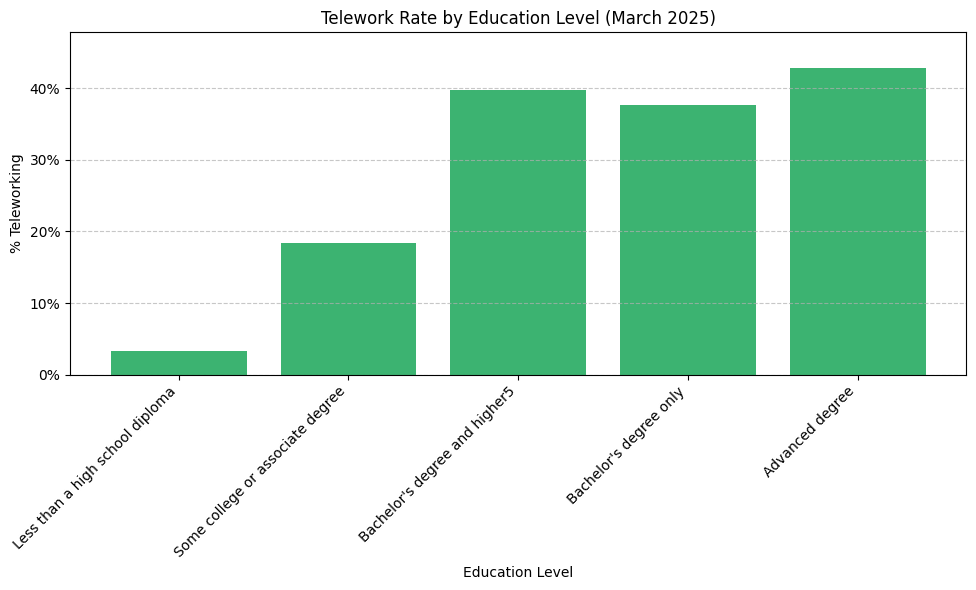

In [10]:
edu_df = df_tele_stat[df_tele_stat["Characteristic"].str.lower().str.contains("diploma|degree")].copy()

# Drop any rows where the percentage is missing
edu_df = edu_df.dropna(subset=["Pct Telework Total"])

# Plot
plt.figure(figsize=(10, 6))
plt.bar(edu_df["Characteristic"], edu_df["Pct Telework Total"], color='mediumseagreen')

# Formatting
plt.title("Telework Rate by Education Level (March 2025)")
plt.xlabel("Education Level")
plt.ylabel("% Teleworking")
plt.xticks(rotation=45, ha='right')
plt.ylim(0, edu_df["Pct Telework Total"].max() + 5)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:.0f}%"))

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

This Graph made a lot of sense to me. Since we found that The most common Telework job is in the Insurence indrustrie I could kinda infer that a higher educational yield would be required to be trusted to work at home. But this makes me wonder, is telework really fair? What prevents people from misreporting hours?

- How many hours on average do a Teleworker working full time clock in compared to an in person worker?

Well below shows data from the [U.S. Bureau of Labor Statistics](https://www.bls.gov/opub/ted/2023/about-1-in-3-workers-in-management-professional-and-related-occupations-teleworked-november-2023.htm) Average Hours dataset:

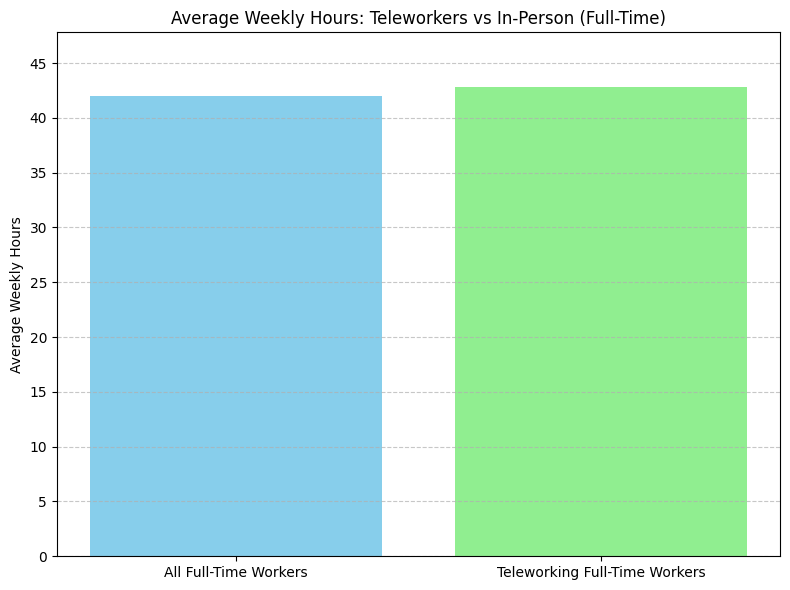

In [11]:
# Filter for "Full-time workers" row
full_time = df_avg_hours[df_avg_hours["Characteristic"] == "Full-time workers"].iloc[0]

# Extract values
avg_hours_all = full_time["All Avg Total Hours"]
avg_hours_telework = full_time["Telework Avg Total Hours"]

# Create data for plotting
labels = ["All Full-Time Workers", "Teleworking Full-Time Workers"]
values = [avg_hours_all, avg_hours_telework]

# Plot
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=["skyblue", "lightgreen"])

# Formatting
plt.title("Average Weekly Hours: Teleworkers vs In-Person (Full-Time)")
plt.ylabel("Average Weekly Hours")
plt.ylim(0, max(values) + 5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().yaxis.set_major_locator(MultipleLocator(5))

# Display
plt.tight_layout()
plt.show()

This graph here really suprised me. According to the dataset, teleworkers report to work more hourse at home an average than Full-Time workers. I wanted to see if there was any data on teleworker fraud hours but I couldnt find anything reliable. So according to the [U.S. Bureau of Labor Statistics](https://www.bls.gov/opub/ted/2023/about-1-in-3-workers-in-management-professional-and-related-occupations-teleworked-november-2023.htm) Teleworkers spend more hours working than in person workers. But from a personal standpoint I cant believe this is completely true. Why would companies rely on a system that can be tampered with, is it due to the COVID pandemic?

- How has COVID affected Working from home?  

Below is the graph made from the both the [WFH Research](https://wfhresearch.com/) before-during COVID dataset and the [U.S. Bureau of Labor Statistics](https://www.bls.gov/opub/ted/2023/about-1-in-3-workers-in-management-professional-and-related-occupations-teleworked-november-2023.htm) dataset:

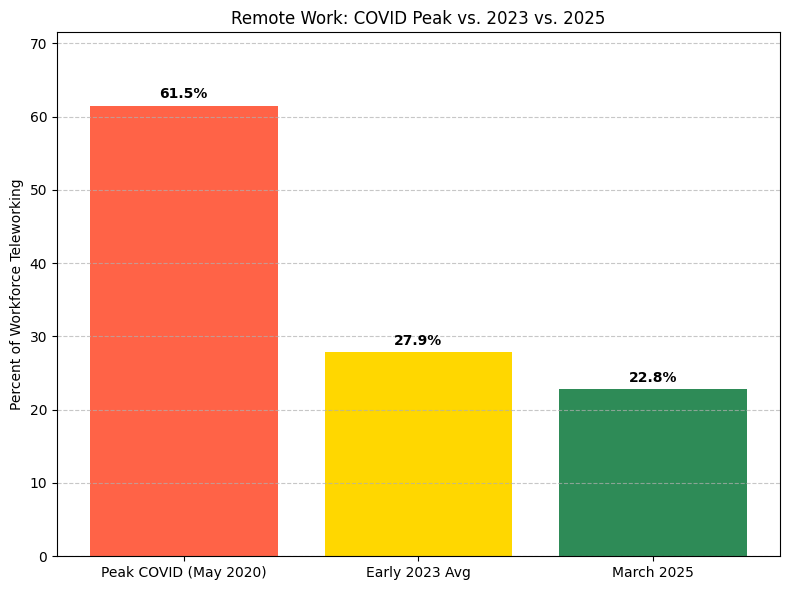

In [12]:
# Extracts COVID peak: May 2020
peak_date = datetime(2020, 5, 1)
peak_covid_pct = df_covid[(df_covid["Date"].dt.month == 5) & (df_covid["Date"].dt.year == 2020)]["COVID-era measurements"].values[0]


# Extracts Mid-COVID Average of Jan–Mar 2023
start = datetime(2023, 1, 1)
end = datetime(2023, 3, 31)
mid_covid_avg = df_covid[(df_covid["Date"] >= start) & (df_covid["Date"] <= end)]["COVID-era measurements"].mean()

# March 2025
march_2025_pct = df_tele_stat[df_tele_stat["Characteristic"] == "Total, 16 years and over"]["Pct Telework Total"].values[0]

# Prepares data
labels = ["Peak COVID (May 2020)", "Early 2023 Avg", "March 2025"]
values = [peak_covid_pct, mid_covid_avg, march_2025_pct]

# Plots data
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=["tomato", "gold", "seagreen"])
plt.title("Remote Work: COVID Peak vs. 2023 vs. 2025")
plt.ylabel("Percent of Workforce Teleworking")
plt.ylim(0, max(values) + 10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(values):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center', fontweight='bold')
plt.tight_layout()
plt.show()


To me this is really interesting to see the decline Telework has made after COVID-19. Its no surpise Peak COVID has such a high percentage over  Early 2023 and March 2025 but what personally surpised me was how The teleworker percentage is still decreasing. It seems that according to the data working from home is actually becoming less prevalent.  

Overall, this was a good testament of my coding skills and investigating skills, the consensus oh how teleworking is evolving in the united states is really kind of abroad and vague estimate but this is what I found. Using the data from the [U.S. Bureau of Labor Statistics](https://www.bls.gov/opub/ted/2023/about-1-in-3-workers-in-management-professional-and-related-occupations-teleworked-november-2023.htm) and [WFH Research](https://wfhresearch.com/) datasets I found that while remote work spiked during COVID-19, it has been on a steady decline since. However, working from home is still quite common, and COVID has done a solid job popularizing telework. We observed that remote work is a very concentrated practice, mainly taking place in industries like Information and Insurance. While industries like medical, and Food remain in-person dominate. This does a great job exposing the major differences in the forms of work. This also reflects in the average teleworker. Teleworkers tend to be older and heavily educated, with either a bachelor's degree or higher. The data also shows that telework has a higher reported work hours than in-person. But this part of the data is purely self reported and could easily be frauded.

In conclusion, the data shows that telework offers different forms of benefits that in person work would expectance. It also shows possible challenges that telework can cause. As businesses continue to adapt and evolve to fit the modern demographic understanding these trends both remote and in person work forms is essential to shaping a better and more effective workplace.